# Supervised Learning Decision Tree Classification Model Fitting

In this notebook, I will be applying the following techniques to predict Titanic survival:
1. Decision Tree Classification (with default settings)
2. Decision Tree Classification with the following optimal hyperparameters identified by using 5-fold Cross Validation
  * Max Depth
  * Min Samples Split
  * Min Samples Leaf
  * Max Features

Let's start by importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Now import the train and test data sets. Take a quick glance at the data and get summary statistics for our variables.

In [2]:
train = pd.read_csv("data/new_train.csv", index_col=0)
train.head(5)

,Survived,Pclass,LastName,Title,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNumber,OtherName
PassengerId,,,,,,,,,,,,
1,0,3,1,1,1,22.0,1,0,7.2500,1,521171,0
2,1,1,2,2,2,38.0,1,0,71.2833,2,17599,1
3,1,3,3,3,2,26.0,0,0,7.9250,1,23101282,0
4,1,1,4,2,2,35.0,1,0,53.1000,1,113803,1
5,0,3,5,1,1,35.0,0,0,8.0500,1,373450,0


In [3]:
train.describe()

,Survived,Pclass,LastName,Title,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNumber,OtherName
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,0.383838,2.308642,297.608305,1.936027,1.352413,29.581787,0.523008,0.381594,32.204208,1.361392,7.546827e+05,0.159371
std,0.486592,0.836071,194.444043,1.725341,0.477990,13.573092,1.102743,0.806057,49.693429,0.635673,3.424854e+06,0.366228
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,0.000000,2.000000,129.000000,1.000000,1.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.742100e+04,0.000000
50%,0.000000,3.000000,277.000000,1.000000,1.000000,28.425581,0.000000,0.000000,14.454200,1.000000,1.135100e+05,0.000000
75%,1.000000,3.000000,460.500000,3.000000,2.000000,36.888889,1.000000,0.000000,31.000000,2.000000,3.474650e+05,0.000000
max,1.000000,3.000000,667.000000,17.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000,2.310129e+07,1.000000


In [4]:
test = pd.read_csv("data/new_test.csv", index_col=0)
test.head(5)

,Pclass,LastName,Title,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNumber,OtherName
PassengerId,,,,,,,,,,,
892,3,263,1,1,34.5,0,0,7.8292,3,330911,0
893,3,668,2,2,47.0,1,0,7.0000,1,363272,1
894,2,669,1,1,62.0,0,0,9.6875,3,240276,0
895,3,670,1,1,27.0,0,0,8.6625,1,315154,0
896,3,397,2,2,22.0,1,1,12.2875,1,3101298,1


In [5]:
test.describe()

,Pclass,LastName,Title,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNumber,OtherName
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,4.180000e+02,418.000000
mean,2.265550,553.385167,1.856459,1.363636,30.048832,0.447368,0.392344,35.556878,1.464115,4.516819e+05,0.186603
std,0.841838,273.607190,1.581812,0.481622,13.329003,0.896760,0.981429,55.859000,0.685516,2.288015e+06,0.390059
min,1.000000,2.000000,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,2.000000e+00,0.000000
25%,1.000000,315.250000,1.000000,1.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.359900e+04,0.000000
50%,3.000000,684.500000,1.000000,1.000000,28.425581,0.000000,0.000000,14.454200,1.000000,5.328650e+04,0.000000
75%,3.000000,777.750000,3.000000,2.000000,37.000000,1.000000,0.000000,31.471875,2.000000,3.457740e+05,0.000000
max,3.000000,875.000000,18.000000,2.000000,76.000000,8.000000,9.000000,512.329200,3.000000,2.310129e+07,1.000000


Feature columns from our data:

In [8]:
feature_cols = ['Pclass','LastName','Title','Sex','Age','SibSp','Parch','Fare','Embarked','TicketNumber','OtherName']

## Decision Tree Classification (with default settings)

Using the new_test and new_train CSV files, predict the Titanic survival with default model settings.

In [2]:
from sklearn import tree 

In [8]:
model = tree.DecisionTreeClassifier(random_state=42)
# Prepare data for model fitting
X = train.loc[:, feature_cols]
y = train.Survived

In [9]:
# Fit a model
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
X_test = test.loc[:, feature_cols]
Survived = model.predict(X_test)

In [11]:
test["Survived"] = Survived

In [12]:
test.drop(['Pclass','LastName','Title','Sex','Age','SibSp','Parch','Fare','Embarked','TicketNumber','OtherName'],
          axis=1, inplace=True)

In [13]:
test.to_csv("data/submission.csv", sep=',')

Result of the 1st submission is not bad:

![](img/submission_01.png)

But I am curious if it can be improved if we applied better hyperparameters.

## Decision Tree Classification with optimal hyperparameters
### Identified using 5-fold Cross Validation

Let's start by re-importing the train and test data sets so we have a clean, new data set.

In [9]:
train = pd.read_csv("data/new_train.csv", index_col=0)
test = pd.read_csv("data/new_test.csv", index_col=0)
X = train.loc[:, feature_cols]
y = train.Survived

### max_depth

The first parameter we will optimize is `max_depth`. Let's test 40 possible values from 1 to 40 for `max_depth` to identify the ideal value.

Value of max_depth with the best accuracy: 3
Performance on test split: 0.8324022346368715


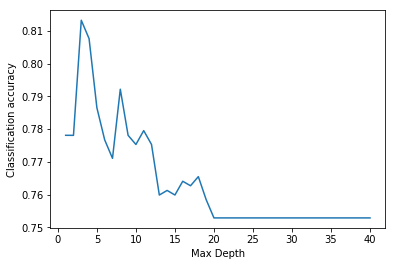

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

max_depth = np.arange(1,41,1)
scores = []

# split the data set into 80% training data and 20% test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

for i in max_depth:
    model = tree.DecisionTreeClassifier(max_depth=i, random_state=42)
    avg_score = np.mean(cross_val_score(model, Xtrain, ytrain, cv=5))
    scores.append(avg_score)
    
# plotting validation performance
plt.plot(max_depth, scores)
plt.xlabel("Max Depth")
plt.ylabel("Classification accuracy")

# Use best value of max_depth and report performance on the test split
best_max_depth = max_depth[np.argmax(scores)]
best_model = tree.DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
best_model.fit(Xtrain,ytrain)

# reporting best accuracy
print("Value of max_depth with the best accuracy:", best_max_depth)
print("Performance on test split:", best_model.score(Xtest,ytest))

### min_samples_split

The second parameter we will optimize is `min_samples_split`. Let's again test 40 possible values but this time, from 2 to 160 for `min_samples_split` to identify the ideal value.

Value of min_samples_split with the best accuracy: 94
Performance on test split: 0.8324022346368715


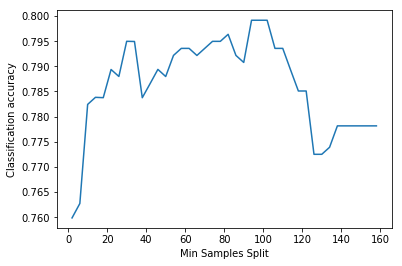

In [17]:
min_samples_split = np.arange(2,160,4)
scores = []

# split the data set into 80% training data and 20% test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

for i in min_samples_split:
    model = tree.DecisionTreeClassifier(min_samples_split=i, random_state=42)
    avg_score = np.mean(cross_val_score(model, Xtrain, ytrain, cv=5))
    scores.append(avg_score)
    
# plotting validation performance
plt.plot(min_samples_split, scores)
plt.xlabel("Min Samples Split")
plt.ylabel("Classification accuracy")

# Use best value of min_samples_split and report performance on the test split
best_min_samples_split = min_samples_split[np.argmax(scores)]
best_model = tree.DecisionTreeClassifier(min_samples_split=best_min_samples_split, random_state=42)
best_model.fit(Xtrain,ytrain)

# reporting best accuracy
print("Value of min_samples_split with the best accuracy:", best_min_samples_split)
print("Performance on test split:", best_model.score(Xtest,ytest))

### min_samples_leaf

The third parameter we will optimize is `min_samples_leaf`. Similar to `max_depth`, let's test 40 possible values from 1 to 40 for `min_samples_leaf` to identify the ideal value.

Value of min_samples_leaf with the best accuracy: 8
Performance on test split: 0.8379888268156425


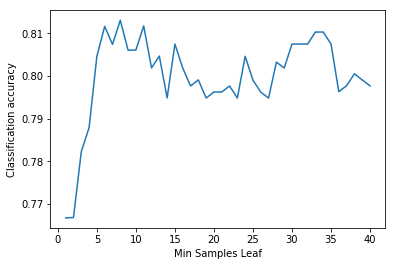

In [24]:
min_samples_leaf = np.arange(1,41,1)
scores = []

# split the data set into 80% training data and 20% test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

for i in min_samples_leaf:
    model = tree.DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    avg_score = np.mean(cross_val_score(model, Xtrain, ytrain, cv=5))
    scores.append(avg_score)
    
# plotting validation performance
plt.plot(min_samples_leaf, scores)
plt.xlabel("Min Samples Leaf")
plt.ylabel("Classification accuracy")

# Use best value of min_samples_leaf and report performance on the test split
best_min_samples_leaf = min_samples_leaf[np.argmax(scores)]
best_model = tree.DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf, random_state=42)
best_model.fit(Xtrain,ytrain)

# reporting best accuracy
print("Value of min_samples_leaf with the best accuracy:", best_min_samples_leaf)
print("Performance on test split:", best_model.score(Xtest,ytest))

### max_features

The final parameter we will optimize is `max_features`

In [30]:
np.arange(1,len(feature_cols)+1,1)
#list(range(1,train.shape[1]))
#len(feature_cols)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Value of max_features with the best accuracy: 10
Performance on test split: 0.8100558659217877


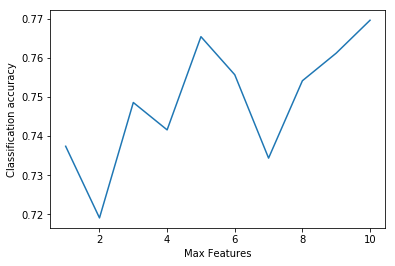

In [37]:
max_features = np.arange(1,len(feature_cols),1)
scores = []

# split the data set into 80% training data and 20% test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

for i in max_features:
    model = tree.DecisionTreeClassifier(max_features=i, random_state=42)
    avg_score = np.mean(cross_val_score(model, Xtrain, ytrain, cv=5))
    scores.append(avg_score)
    
# plotting validation performance
plt.plot(max_features, scores)
plt.xlabel("Max Features")
plt.ylabel("Classification accuracy")

# Use best value of max_features and report performance on the test split
best_max_features = max_features[np.argmax(scores)]
best_model = tree.DecisionTreeClassifier(max_features=best_max_features, random_state=42)
best_model.fit(Xtrain,ytrain)

# reporting best accuracy
print("Value of max_features with the best accuracy:", best_max_features)
print("Performance on test split:", best_model.score(Xtest,ytest))

Let's take our _best_ optimized hyperparameters and create the _best_ model. Then, fit the model and make preditions.

In [38]:
best_model = tree.DecisionTreeClassifier(max_depth = best_max_depth,
                                         max_features = best_max_features,
                                         min_samples_split = best_min_samples_split,
                                         min_samples_leaf = best_min_samples_leaf,
                                         random_state=42)

In [39]:
# Fit a model
best_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=94,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [40]:
X_test = test.loc[:, feature_cols]
Survived = best_model.predict(X_test)

In [41]:
test["Survived"] = Survived

Prepare the predictions for submission.

In [42]:
test.drop(['Pclass','LastName','Title','Sex','Age','SibSp','Parch','Fare','Embarked','TicketNumber','OtherName'],
          axis=1, inplace=True)

In [43]:
test.to_csv("data/submission.csv", sep=',')

The results are an improvement:

![](img/submission_02.png)

We can observe a 3.35% improvement of accuracy using optimized hyperparameters.